# Step 1: Install Libraries

In [ ]:
!pip install tensorflow keras opencv-python matplotlib

# Step 2: Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Step 3: Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 4: Load Dataset

In [ ]:
dataset_path = "/content/drive/MyDrive/face_mask_dataset/"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset="validation"
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


# Step 5: Build Model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# Step 6: Train Model

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 68/189 ━━━━━━━━━━━━━━━━━━━━ 12:38 6s/step - accuracy: 0.6268 - loss: 0.7561

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 1549s 8s/step - accuracy: 0.7327 - loss: 0.5647 - val_accuracy: 0.8887 - val_loss: 0.2628
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 116s 612ms/step - accuracy: 0.8745 - loss: 0.2987 - val_accuracy: 0.9152 - val_loss: 0.2240
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 116s 613ms/step - accuracy: 0.9042 - loss: 0.2449 - val_accuracy: 0.9291 - val_loss: 0.1987
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 115s 610ms/step - accuracy: 0.9074 - loss: 0.2241 - val_accuracy: 0.9272 - val_loss: 0.1842
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 114s 605ms/step - accuracy: 0.9073 - loss: 0.2194 - val_accuracy: 0.9364 - val_loss: 0.1875
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 114s 600ms/step - accuracy: 0.9209 - loss: 0.2006 - val_accuracy: 0.9351 - val_loss: 0.1790
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 114s 603ms/step - accuracy: 0.9262 - loss: 0.1965 - val_accuracy: 0.9338 - val_loss: 0.1810
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 112s 594ms/step - accuracy: 0.9326 - loss: 0.1774

# Step 7: Plot Results

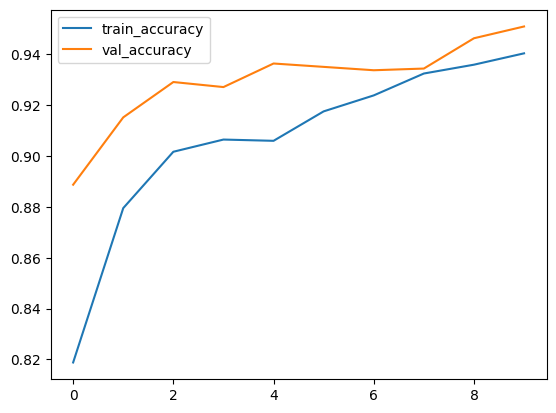

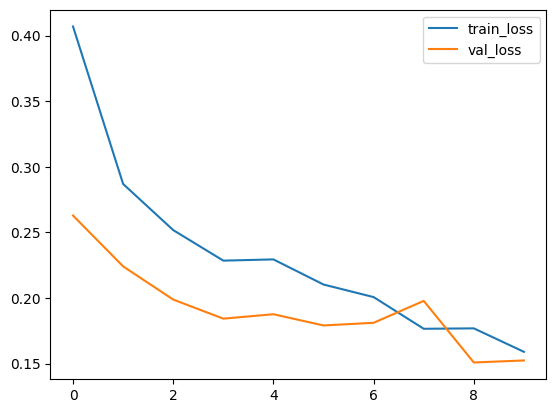

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Step 8: Save Model

In [ ]:
model.save("face_mask_detector.h5")

In [ ]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("face_mask_detector.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# (Optional) Optimized for mobile: reduced size, faster inference
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert
tflite_model = converter.convert()

# Save .tflite model
with open("face_mask_detector.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved successfully!")


Saved artifact at '/tmp/tmpgu12cojr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139712217115408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139712217112912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139712217115984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139712217114064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139712217116368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139712217118096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139712217116944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139712217118864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139712217119056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139712217119440: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model save

In [ ]:
print(train_data.class_indices)


{'with_mask': 0, 'without_mask': 1}


# Step 9: Predict on New Image

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/ddd.PNG"

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]

plt.imshow(image.load_img(img_path))
plt.axis("off")
print("Prediction value:", prediction)

# Correct Interpretation:
# prediction >= 0.5 means class 1 → WITHOUT MASK
# prediction < 0.5 means class 0 → WITH MASK

if prediction >= 0.5:
    print("NO MASK ❌")
else:
    print("MASK 😷")


In [ ]:
from google.colab import files
files.download("face_mask_detector.tflite")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>